In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  #Random forest
from sklearn.linear_model import LogisticRegression  #Logistic Regression
from sklearn.preprocessing import StandardScaler     #Logistic Regression  #SVM
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

In [ ]:
uploaded = files.upload()

Saving card_transdata.csv to card_transdata.csv


In [ ]:
data = pd.read_csv("card_transdata.csv").sample(1000, random_state = 42)

In [ ]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
data.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
data.shape

(1000000, 8)

In [ ]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [ ]:
data.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [ ]:
missing_values = data.isnull().any(axis=1)
print("Rows with Missing Values:")
print(missing_values)

Rows with Missing Values:
0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool


In [ ]:
duplicate_rows = data[data.duplicated()]
print("Duplicated Rows")
print(duplicate_rows)

Duplicated Rows
Empty DataFrame
Columns: [distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order, fraud]
Index: []


In [ ]:
data.dropna(axis = 0, inplace = True)

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
chip_pin_fraud = data[["used_chip", "used_pin_number", "fraud"]]

In [ ]:
total_transactions = len(chip_pin_fraud)
total_fraud = chip_pin_fraud['fraud'].sum()
fraud_by_chip = chip_pin_fraud[chip_pin_fraud["used_chip"] == 1]["fraud"].sum()
fraud_by_pin = chip_pin_fraud[chip_pin_fraud["used_pin_number"] == 1]["fraud"].sum()

In [ ]:
print("Total Transactions: ", total_transactions)
print("Total fraud cases: ", total_fraud)
print("Fraud cases using chip: {} out of {}".format(fraud_by_chip, total_transactions))
print("Fraud cases using pin: {} out of {}".format(fraud_by_pin, total_transactions))

Total Transactions:  1000000
Total fraud cases:  87403.0
Fraud cases using chip: 22410.0 out of 1000000
Fraud cases using pin: 273.0 out of 1000000


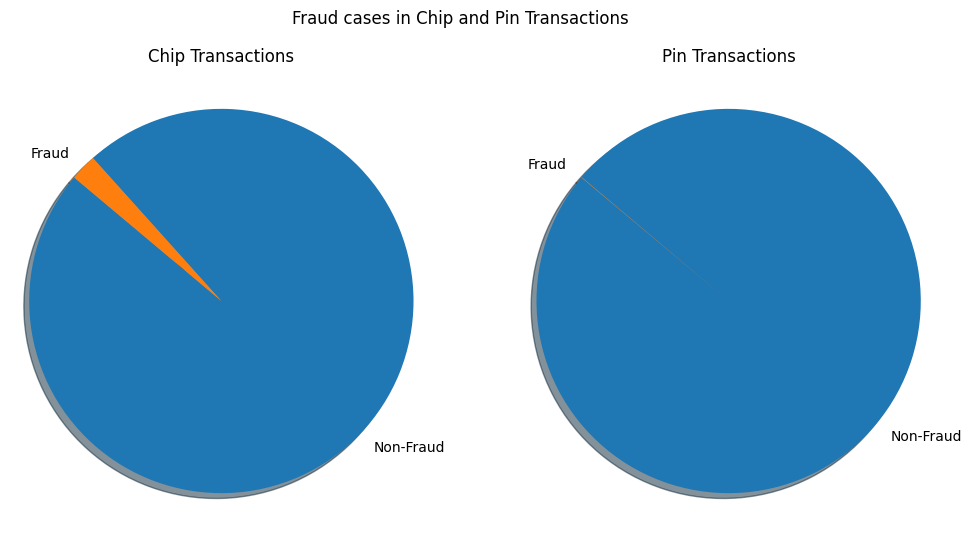

In [ ]:
labels_chip = ["Non-Fraud", "Fraud"]
sizes_chip = [total_transactions - fraud_by_chip, fraud_by_chip]
colors_chip = ["lightskyblue", "lightcoral"]
labels_pin = ["Non-Fraud", "Fraud"]
sizes_pin = [total_transactions - fraud_by_pin, fraud_by_pin]
colors_pin = ["lightskyblue", "lightcoral"]
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.pie(sizes_chip, labels = labels_chip,shadow = True, startangle = 140)
plt.axis("equal")
plt.title("Chip Transactions")
plt.subplot(1,2,2)
plt.pie(sizes_pin, labels = labels_pin, shadow = True, startangle = 140)
plt.axis("equal")
plt.title("Pin Transactions")
plt.suptitle("Fraud cases in Chip and Pin Transactions")
plt.show()

In [ ]:
repeat_retailer_df = data[data["repeat_retailer"] == 1]

In [ ]:
fraud_sequences = []
current_sequence = []

for index, row in repeat_retailer_df.iterrows():
  repeat_retailer, is_fraud = row['repeat_retailer'], row['fraud']

  if is_fraud == 1:
    if current_sequence:
      fraud_sequences.append(current_sequence.copy())
    current_sequence = []

  else:
    current_sequence.append('Repeat Retailer' if repeat_retailer == 1 else 'No Repeat Retailer')

for i, sequence in enumerate(fraud_sequences[:10], start = 1):
  print(f"Fraud Sequence {i}: {','.join(sequence)}")

Fraud Sequence 1: Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
Fraud Sequence 2: Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
Fraud Sequence 3: Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
Fraud Sequence 4: Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
Fraud Sequence 5: Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
Fraud Sequence 6: Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer
Fraud Sequence 7: Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Retailer,Repeat Ret

In [ ]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
correlation_df = data[["ratio_to_median_purchase_price", "fraud"]]

In [ ]:
correlation = correlation_df["ratio_to_median_purchase_price"].corr(correlation_df["fraud"])
print(f"Correlation between transaction amount and fraud:{correlation}")

Correlation between transaction amount and fraud:0.4623047222882617


In [ ]:
avgnonfraudtransaction = correlation_df[correlation_df["fraud"] == 0]["ratio_to_median_purchase_price"].mean()
avgfraudtransaction = correlation_df[correlation_df["fraud"] == 1]["ratio_to_median_purchase_price"].mean()
print(f"Average ratio to median purchase price for non fraudelent transactions:{avgnonfraudtransaction}")
print(f"Average ratio to median purchase price for fraudelent transactions:{avgfraudtransaction}")

Average ratio to median purchase price for non fraudelent transactions:1.423641855458059
Average ratio to median purchase price for fraudelent transactions:6.006323490486969


Text(0, 0.5, 'Average ratio to median purchase price')

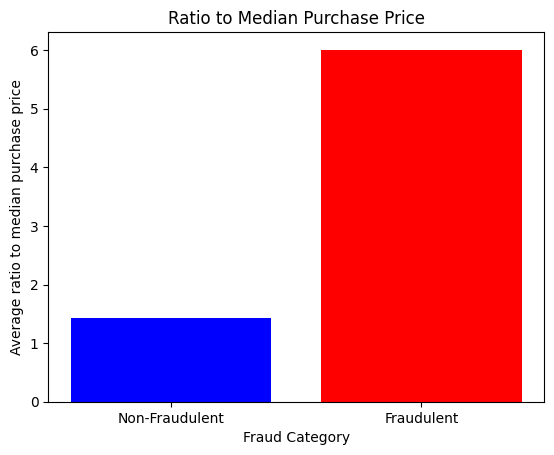

In [ ]:
categories = ["Non-Fraudulent", "Fraudulent"]
average_ratio = [avgnonfraudtransaction, avgfraudtransaction]
plt.bar(categories, average_ratio, color=['blue', 'red'])
plt.title("Ratio to Median Purchase Price")
plt.xlabel("Fraud Category")
plt.ylabel("Average ratio to median purchase price")

In [ ]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
online_order_df = data[["online_order", "fraud"]]

In [ ]:
total_online_orders = online_order_df["online_order"].sum()
total_online_fraud = online_order_df[(online_order_df["fraud"] == 1) & (online_order_df["online_order"] == 1)]["fraud"].count()
fraud_rate_online = total_online_fraud/total_online_orders
total_offline_orders = len(online_order_df) - total_online_orders
total_offline_fraud = online_order_df[(online_order_df["fraud"] == 1) & (online_order_df["online_order"] == 0)]["fraud"].count()
fraud_rate_offline = total_offline_fraud/total_offline_orders
print(f"Fraud rate for online trasactions: {fraud_rate_online:.2%} ({total_online_fraud} cases out of {total_online_orders} online transactions)")
print(f"Fraud rate for offline trasactions: {fraud_rate_offline:.2%} ({total_offline_fraud} cases out of {total_offline_orders} offline transactions)")

Fraud rate for online trasactions: 12.71% (82711 cases out of 650552.0 online transactions)
Fraud rate for offline trasactions: 1.34% (4692 cases out of 349448.0 offline transactions)


In [ ]:
X = data.drop("fraud", axis = 1)
y = data["fraud"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
rf_classifier = RandomForestClassifier(random_state = 42)
rf_classifier.fit(X_train, y_train)
feature_importances = pd.Series(rf_classifier.feature_importances_, index = X.columns).sort_values(ascending = False)
print("Ranked Feature Importance")
print(feature_importances)

Ranked Feature Importance
ratio_to_median_purchase_price    0.527171
online_order                      0.169382
distance_from_home                0.134910
used_pin_number                   0.063928
used_chip                         0.052078
distance_from_last_transaction    0.045711
repeat_retailer                   0.006820
dtype: float64


In [ ]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
X = data.drop("fraud", axis = 1)
y = data["fraud"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
rf_classifier = RandomForestClassifier(random_state = 42)
rf_classifier.fit(X_train, y_train)
new_transaction_features = data.sample(1).drop('fraud', axis = 1)
print("\nRandomly sampled features for new transaction:")
print(new_transaction_features)
prediction = rf_classifier.predict(new_transaction_features)
print("\nPrediction for new transaction")
print("Fraud" if prediction[0] == 1 else "Legitimate")


Randomly sampled features for new transaction:
        distance_from_home  distance_from_last_transaction  \
152394            6.236826                        0.930877   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
152394                        1.047504              1.0        0.0   

        used_pin_number  online_order  
152394              0.0           1.0  

Prediction for new transaction
Legitimate


In [ ]:
new_transaction = pd.DataFrame({
    'distance_from_home' : [56],
    'distance_from_last_transaction' : [123],
    'ratio_to_median_purchase_price' : [9.4],
    'repeat_retailer' : [1],
    'used_chip' : [1],
    'used_pin_number' : [0],
    'online_order' : [0]
})
prediction = rf_classifier.predict(new_transaction)
print("\nPrediction for new transaction:")
print("Fraud" if prediction[0] == 1 else "Legitimate")


Prediction for new transaction:
Fraud


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
log_reg_classifier = LogisticRegression(max_iter = 1000, random_state = 42)
log_reg_classifier.fit(X_train_scaled, y_train)
new_transaction1 = pd.DataFrame({
    'distance_from_home' : [56],
    'distance_from_last_transaction' : [123],
    'ratio_to_median_purchase_price' : [9.4],
    'repeat_retailer' : [1],
    'used_chip' : [1],
    'used_pin_number' : [0],
    'online_order' : [0]
})
prediction = log_reg_classifier.predict(scaler.transform(new_transaction1))
print("\nPrediction for new Transaction: ")
print("Fraud" if prediction[0] == 1 else "Legitimate")


Prediction for new Transaction: 
Fraud


In [ ]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
X = data.drop("fraud", axis = 1)
y = data["fraud"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_classifier = SVC(kernel = "linear", probability = True, random_state = 42)
calibrated_svm = CalibratedClassifierCV(svm_classifier)
calibrated_svm.fit(X_scaled, y)
distance_from_home = float(input("Enter Distance from Home: "))
distance_from_last_transaction = float(input("Enter Distance from Last Transaction: "))
ratio_to_median_purchase_price = float(input("Enter Ratio to Median Purchase Price: "))
repeat_retailer = int(input("Enter Repeat Retailer(0 or 1): "))
used_chip = int(input("Enter Used chip(0 or 1): "))
used_pin_number = int(input("Enter Used pin number(0 or 1): "))
online_order = int(input("Enter Online order(0 or 1): "))
new_transaction2 = pd.DataFrame({
    'distance_from_home' : [distance_from_home],
    'distance_from_last_transaction' : [distance_from_last_transaction],
    'ratio_to_median_purchase_price' : [ratio_to_median_purchase_price],
    'repeat_retailer' : [repeat_retailer],
    'used_chip' : [used_chip],
    'used_pin_number' : [used_pin_number],
    'online_order' : [online_order]
})
scaled_transaction = scaler.transform(new_transaction2)
prediction = calibrated_svm.predict(scaled_transaction)
probability_of_fraud = calibrated_svm.predict_proba(scaled_transaction)[:,1][0]
print("\nPrediction for new Transaction: ")
print("Fraud" if prediction[0] == 1 else "Legitimate")
print(f"Probability of Fraud: {probability_of_fraud * 100:.2f}%")

Enter Distance from Home: 53
Enter Distance from Last Transaction: 12
Enter Ratio to Median Purchase Price: 1.
Enter Repeat Retailer(0 or 1): 0
Enter Used chip(0 or 1): 0
Enter Used pin number(0 or 1): 1
Enter Online order(0 or 1): 1

Prediction for new Transaction: 
Legitimate
Probability of Fraud: 0.50%


In [ ]:
y_pred = log_reg_classifier.predict(X_test_scaled)
precision = precision_score(y_test, y_pred)  #Ratio of correctly predictive positive observations to total predicted positive
recall = recall_score(y_test, y_pred)        #Ratio of directly predicted positive observations to total observations
f1 = f1_score(y_test, y_pred)                #Indicates better performance from 0 - 1, higher the f1 score -> better performance
accuracy = accuracy_score(y_test, y_pred)
print("\nEvaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"f1 score: {f1:.4f}")
print(f"accuracy: {accuracy:.4f}")


Evaluation Metrics:
Precision: 0.5714
Recall: 0.2500
f1 score: 0.3478
accuracy: 0.9250
